In [23]:
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [24]:
import numpy as np
import scipy.stats as sts
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
dbPath = "Resources/hawaii.sqlite"
engine = create_engine(f"sqlite:///{dbPath}")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [44]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
s = Session(bind = engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
s.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [10]:
# Use date, set as a variable
rec_date = dt.date(2017, 8, 23)
print(rec_date)

2017-08-23


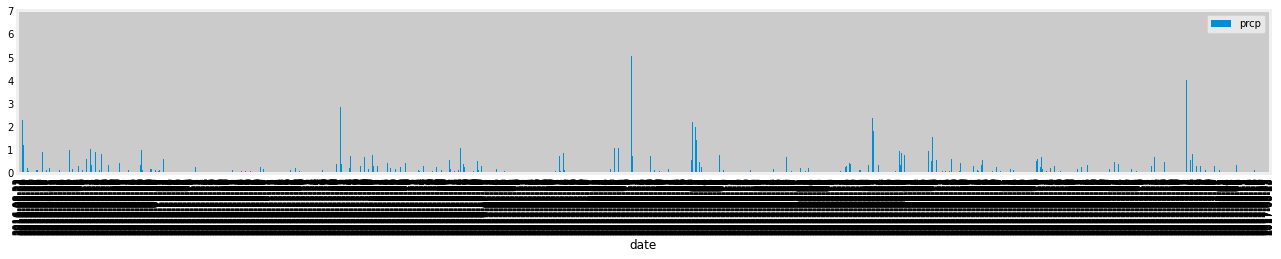

<Figure size 432x288 with 0 Axes>

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
conn = engine.connect()
data = pd.read_sql("SELECT date , prcp FROM measurement WHERE date BETWEEN '2016-08-23' AND '2017-08-23' ORDER BY date", conn)

# Save the query results as a Pandas DataFrame and set the index to the date column
hiRain_df = data.set_index('date')

# Sort the dataframe by date
hiRain_df = hiRain_df.sort_index()
hiRain_df

# Use Pandas Plotting with Matplotlib to plot the data
hiRain_df.plot(kind="bar", figsize=(20,3))
plt.show()
plt.tight_layout()


In [37]:
# Use Pandas to calcualte the summary statistics for the precipitation data
# Measures of central tendency
prcp = data['prcp']

mean_np = np.mean(prcp)
print(f"The mean recorded rain in Hawaii for the 12-month period is {mean_np} inches")

med_np = np.median(prcp)
print(f"The median recorded rain in Hawaii for the 12-month period is {med_np} inches")

mode_st = sts.mode(prcp)
print(f"The mode recorded rain in Hawaii for the 12-month period is {mode_st} inches")

print("--------")
# Calculating Variance and Standard Deviation
var_np = np.var(prcp,ddof = 0)
print(f"The population variance using the NumPy module is {var_np}")

sd_np = np.std(prcp,ddof = 0)
print(f"The population standard deviation using the NumPy module is {sd_np}")

print("--------")
# Calculating the 'Empirical Rule' AKA 68-95-99.7 using standard deviation {sd_np}
print(f"Roughly 68% of the data is between {round(mean_np-sd_np,3)} and {round(mean_np+sd_np,3)}")
print(f"Roughly 95% of the data is between {round(mean_np-2*sd_np,3)} and {round(mean_np+2*sd_np,3)}")
print(f"Roughly 99.7% of the data is between {round(mean_np-3*sd_np,3)} and {round(mean_np+3*sd_np,3)}")

The mean recorded rain in Hawaii for the 12-month period is 0.17727857496288968 inches
The median recorded rain in Hawaii for the 12-month period is nan inches
The mode recorded rain in Hawaii for the 12-month period is ModeResult(mode=array([0.]), count=array([874])) inches
--------
The population variance using the NumPy module is 0.21259051566664816
The population standard deviation using the NumPy module is 0.46107539043701756
--------
Roughly 68% of the data is between -0.284 and 0.638
Roughly 95% of the data is between -0.745 and 1.099
Roughly 99.7% of the data is between -1.206 and 1.561


# Exploratory Station Analysis

In [47]:
# Design a query to calculate the total number stations in the dataset
station_count = s.query(Station).count()
print(f"There are {station_count} stations in the dataset")

There are 9 stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_station = s.query(Measurement)

In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
s.close()